<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/6_Diabetics_deeplearning_classification_with_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

import seaborn as sns
%matplotlib inline


In [2]:
data=("https://raw.githubusercontent.com/rohailkhan/data/main/diabetes.csv")
diabetics=pd.read_csv(data ,error_bad_lines=False)
diabetics.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetics.shape

(768, 9)

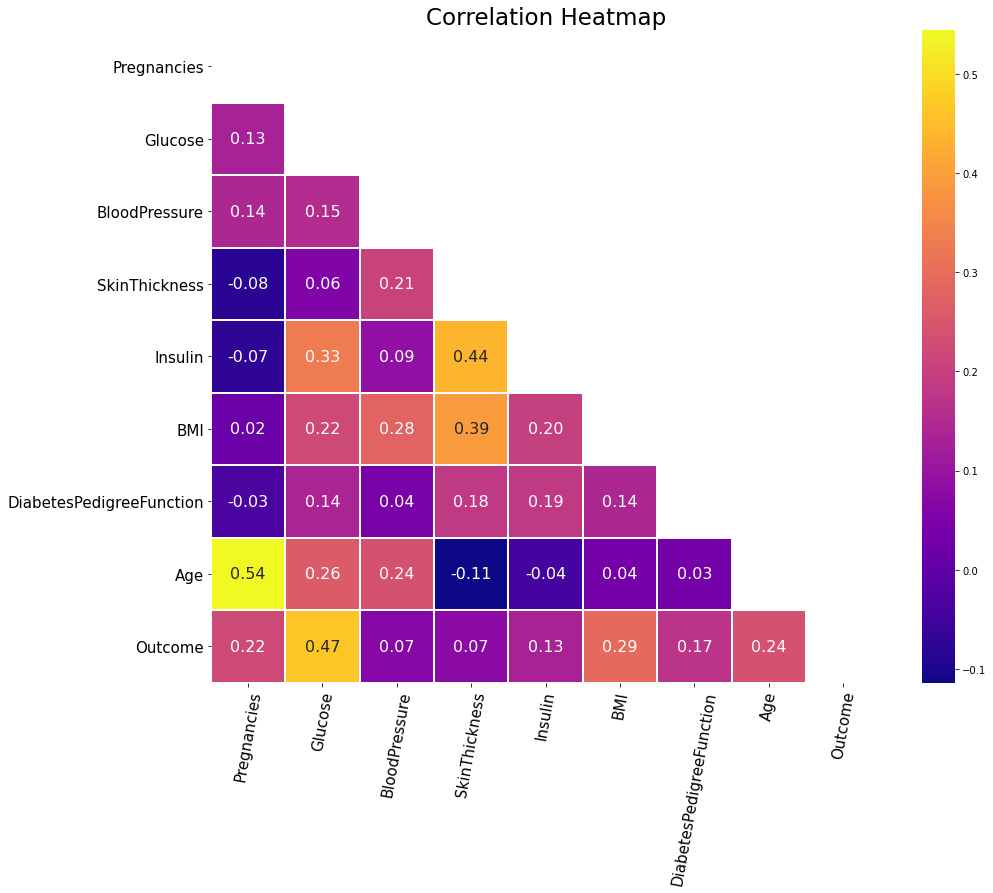

In [3]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))
mask = np.triu(diabetics.corr())
# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(diabetics.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={"size": 16})

plt.yticks(rotation = 0,size=15)
plt.xticks(rotation = 80,size=15)
plt.title('Correlation Heatmap',size=23)
plt.show()

Model will be trained using deeplearning Dense model. Sicne its classification problem (with 2 classes) thereofore 'aacuracy' metrics is used with 'binary_crossentropy' loss.

For checkpoint , validation accuracy will be monitored and save in given file path in hdf5 format. 

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

from keras.metrics import BinaryAccuracy


In [24]:
from tensorflow.keras.optimizers import Adam

In [66]:
diabetics.shape

(768, 9)

In [8]:
import os
os.getcwd()

'/content'

In [81]:
path=os.getcwd() + '/weights-improvement shown in epoch={epoch:02d} with accuracy_improvement= {val_accuracy:.2f}.hdf5'

In [82]:
model=Sequential()
model.add(Dense(20,activation='relu',input_dim=8 ,kernel_initializer='glorot_uniform'))
model.add(Dense(20,activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=BinaryCrossentropy(),
              metrics='accuracy')



In [83]:
X=np.array(diabetics.iloc[:,0:8])
Y=np.array(diabetics.iloc[:,8])

In [84]:
checkpoint = ModelCheckpoint(filepath=path, monitor='val_accuracy' ,verbose=1, save_best_only=True,
mode='max')

In [85]:
callback_list=[checkpoint]

In [86]:
history=model.fit(X,Y ,validation_split=0.3, epochs=150,batch_size=10,callbacks=callback_list,verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.64502, saving model to /content/weights-improvement shown in epoch=01 with accuracy_improvement= 0.65.hdf5

Epoch 00002: val_accuracy improved from 0.64502 to 0.64935, saving model to /content/weights-improvement shown in epoch=02 with accuracy_improvement= 0.65.hdf5

Epoch 00003: val_accuracy improved from 0.64935 to 0.66234, saving model to /content/weights-improvement shown in epoch=03 with accuracy_improvement= 0.66.hdf5

Epoch 00004: val_accuracy did not improve from 0.66234

Epoch 00005: val_accuracy did not improve from 0.66234

Epoch 00006: val_accuracy did not improve from 0.66234

Epoch 00007: val_accuracy did not improve from 0.66234

Epoch 00008: val_accuracy did not improve from 0.66234

Epoch 00009: val_accuracy did not improve from 0.66234

Epoch 00010: val_accuracy did not improve from 0.66234

Epoch 00011: val_accuracy did not improve from 0.66234

Epoch 00012: val_accuracy did not improve from 0.66234

Epoch 00013: va

In [87]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


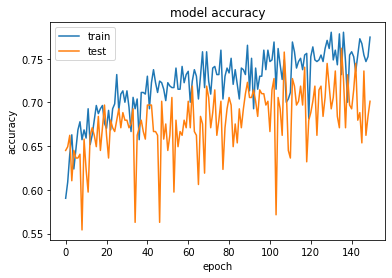

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

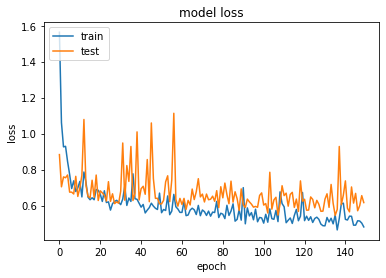

In [89]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()